# Milestone 1
St. Syakirah, Batch 16

## Identifikasi Masalah
Indonesia menjadi salah satu negara yang berada di wilayah "Ring of Fire", yang dicirikan dengan banyaknya gunung api di Indonesia. Indonesia juga terletak di pertemuan antar 3 lempeng utama di dunia, lempeng Pasifik, Eurasia, dan Indo-Australia-dan lempeng Filipina yang jauh lebih kecil. 2 Hal ini menyebabkan Indonesia rawan terhadap bencana gempabumi. 

Diberikan sebuah data gempabumi Indonesia dari tahun 2017 hingga 2022. Data ini digunakan untuk menentukan upaya apa yang bisa dilakukan untuk mengurangi

Untuk menganalisis seismisitas, diperlukan poin-poin penjabaran, yakni:
1. Sebaran data gempabumi Indonesia tahun 2017 s.d tahun 2022? 
2. Wilayah mana saja yang memiliki seismisitas yang tinggi. 
3. Tipe gempabumi yang paling sering terjadi di Indonesia berdasarkan magnitudonya.
4. Tipe gempabumi yang paling sering terjadi di Indonesia berdasarkan kedalamannya. 
5. Berapa banyak gempabumi merusak terjadi? Dimana terjadi?
6. Tahun berapa seismisitas tertinggi.


## Import Library yang dibutuhkan

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Data Loading

Dataset: Katalog gempabumi di Indonesia tahun 2008 - 2022, namun hanya dianalisis dari tahun 2017.
Source: Kaggle
URL : https://www.kaggle.com/datasets/kekavigi/earthquakes-in-indonesia

Link dashboard : https://public.tableau.com/views/Milestone1_16667982745350/MileStone1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [84]:
df = pd.read_csv('D:\Project & Data\Project\Milestone\katalog_gempa.csv')
df.head()

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
#Melihat informasi tipe data di setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88589 entries, 0 to 88588
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      88589 non-null  object 
 1   ot       88589 non-null  object 
 2   lat      88589 non-null  float64
 3   lon      88589 non-null  float64
 4   depth    88589 non-null  int64  
 5   mag      88589 non-null  float64
 6   remark   88589 non-null  object 
 7   strike1  2581 non-null   float64
 8   dip1     2581 non-null   float64
 9   rake1    2581 non-null   float64
 10  strike2  2581 non-null   float64
 11  dip2     2581 non-null   float64
 12  rake2    2581 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 8.8+ MB


In [86]:
#Mengubah tipe data tanggal dari objek ke datetime64
df['tgl'] = df['tgl'].astype('datetime64[ns]')
df.head()

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008-11-01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-11-01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-11-01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-11-01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-11-01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
#Memfilter data dari tahun 2017 
data_filter = df.loc[(df['tgl'] >= '2017-01-01')].reset_index(drop=True)
data_filter.head()

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2020-08-04,05:28:05.200,-1.49,100.15,10,3.8,Southern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-04,23:51:12.310,-1.65,100.25,41,5.0,Southern Sumatra - Indonesia,133.8,64.4,47.1,18.8,48.6,144.8
2,2020-08-04,23:51:12.310,-1.65,100.25,41,5.0,Southern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-08-03,12:06:23.133,1.12,97.46,19,3.2,Northern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-08-04,16:37:30.478,-5.17,101.97,10,3.8,Southwest of Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
#Mengecek jumlah data
data_filter.shape

(59260, 13)

In [89]:
#Drop data duplikat
data = data_filter.drop_duplicates().reset_index(drop=True)


In [90]:
#Mengecek jumlah data setelah drop data duplikat
data.shape

(58826, 13)

In [91]:
#Mengganti nama kolom
data.rename({'tgl':'date', 'ot' : 'time', 'lat' : 'latitude', 'long' :'longitude', 'mag': 'magnitudo', 'remark' : 'region'}, axis='columns', inplace=True)
data.head()

,date,time,latitude,lon,depth,magnitudo,region,strike1,dip1,rake1,strike2,dip2,rake2
0,2020-08-04,05:28:05.200,-1.49,100.15,10,3.8,Southern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-04,23:51:12.310,-1.65,100.25,41,5.0,Southern Sumatra - Indonesia,133.8,64.4,47.1,18.8,48.6,144.8
2,2020-08-04,23:51:12.310,-1.65,100.25,41,5.0,Southern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-08-03,12:06:23.133,1.12,97.46,19,3.2,Northern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-08-04,16:37:30.478,-5.17,101.97,10,3.8,Southwest of Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [92]:
# Mengecek ulang missing values
data.isnull().sum()

date             0
time             0
latitude         0
lon              0
depth            0
magnitudo        0
region           0
strike1      56560
dip1         56560
rake1        56560
strike2      56560
dip2         56560
rake2        56560
dtype: int64

Total data : 59260, total missing values untuk masing" kolom strike, dip, rake : 56560. Hal ini menunjukkan beberapa kolom memiliki missing values sebeear 50%. Data strike, dip, dan rake yang digunakan untuk mengetahui penyebab gempabumi. Problem statement hanya ingin mengetahui seismistas, sehingga kita tidak membutuhkan data tersebut. Oleh karena itu, dilakukan drop kolom untuk mengatasi missing values.

In [93]:
#drop kolom yang tidak diperlukan
data.drop(["strike1", "dip1", "rake1", "strike2", "dip2", "rake2"], axis = 1, inplace=True)

In [94]:
# Mengecek ulang missing values
data.isnull().sum()

date         0
time         0
latitude     0
lon          0
depth        0
magnitudo    0
region       0
dtype: int64

Karena semua data sudah lengkap dan tidak ditemukannya lagi missing values, cleaning data selesai.

## Eksplorasi Data

In [95]:
#Menambah kolom 'Tipe_Gempa(Magnitudo)'
data['Tipe_Gempa(Mag)'] = pd.cut(data['magnitudo'],
                                        bins = [0, 1.0, 2.9, 4.9, 6.9, 7.9, 9.5],
                                        labels = ['Ultra Mikro', ' Mikro', 'Kecil', 'Sedang', 'Besar', 'Sangat Besar'])
data.head()

,date,time,latitude,lon,depth,magnitudo,region,Tipe_Gempa(Mag)
0,2020-08-04,05:28:05.200,-1.49,100.15,10,3.8,Southern Sumatra - Indonesia,Kecil
1,2020-08-04,23:51:12.310,-1.65,100.25,41,5.0,Southern Sumatra - Indonesia,Sedang
2,2020-08-04,23:51:12.310,-1.65,100.25,41,5.0,Southern Sumatra - Indonesia,Sedang
3,2020-08-03,12:06:23.133,1.12,97.46,19,3.2,Northern Sumatra - Indonesia,Kecil
4,2020-08-04,16:37:30.478,-5.17,101.97,10,3.8,Southwest of Sumatra - Indonesia,Kecil


In [96]:
#Menambah kolom 'Tipe_Gempa(Depth)'
data['Tipe_Gempa(Depth)'] = pd.cut(data['depth'],
                                        bins = [0, 100, 300, 700],
                                        labels = ['Dangkal', 'Menengah', 'Dalam'])
data.head()

,date,time,latitude,lon,depth,magnitudo,region,Tipe_Gempa(Mag),Tipe_Gempa(Depth)
0,2020-08-04,05:28:05.200,-1.49,100.15,10,3.8,Southern Sumatra - Indonesia,Kecil,Dangkal
1,2020-08-04,23:51:12.310,-1.65,100.25,41,5.0,Southern Sumatra - Indonesia,Sedang,Dangkal
2,2020-08-04,23:51:12.310,-1.65,100.25,41,5.0,Southern Sumatra - Indonesia,Sedang,Dangkal
3,2020-08-03,12:06:23.133,1.12,97.46,19,3.2,Northern Sumatra - Indonesia,Kecil,Dangkal
4,2020-08-04,16:37:30.478,-5.17,101.97,10,3.8,Southwest of Sumatra - Indonesia,Kecil,Dangkal


In [97]:
#Mengecek data" region
data.region.unique()

array(['Southern Sumatra - Indonesia', 'Northern Sumatra - Indonesia',
       'Southwest of Sumatra - Indonesia', 'Sunda Strait - Indonesia',
       'Off West Coast of Northern Sumatra',
       'North of Halmahera - Indonesia', 'Bali Sea',
       'Sulawesi - Indonesia', 'Sumbawa Region - Indonesia',
       'South of Bali - Indonesia', 'Minahassa Peninsula - Sulawesi',
       'Flores Sea', 'Java - Indonesia', 'Near North Coast of Irian Jaya',
       'Northern Molucca Sea', 'Banda Sea', 'Talaud Islands - Indonesia',
       'Halmahera - Indonesia', 'Seram - Indonesia',
       'South of Java - Indonesia', 'Southern Molucca Sea',
       'Irian Jaya - Indonesia', 'Irian Jaya Region - Indonesia',
       'Sumba Region - Indonesia', 'Celebes Sea', 'Timor Region',
       'Bali Region - Indonesia', 'Mindanao - Philippines',
       'Flores Region - Indonesia', 'Ceram Sea', 'Buru - Indonesia',
       'Tanimbar Islands Reg. - Indonesia',
       'Aru Islands Region - Indonesia', 'Savu Sea',
       'S

### Sebaran data gempabumi Indonesia tahun 2017 s.d tahun 2022

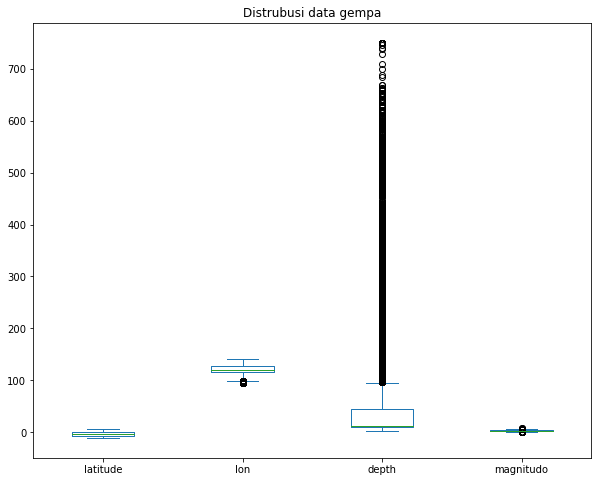

In [98]:
#Mengecek oulier di setiap kolom
data.plot(kind='box', title = 'Distrubusi data gempa', figsize=(10,8), showfliers=True)
plt.show()

Hasil plot menunjukkan sebuah anomali di dalam data kedalaman gempabumi dengan outlier sangat banyak. Oleh karena itu, kita akan fokus menganalisis sebaran data kedalaman.

In [99]:
#Mengecek skewness
data['depth'].skew()

3.9090295103463037

Berdasarkan skewness values,  distribusi data kedalaman gempabumi tergolong distribusi data tidak normal. Hal ini dikarenakan skewness value > 0.5. Selanjutnya mari kita hitung berapa banyak data outlier.

In [100]:
# Menghitung nilai kuartil
Q1 = data.depth.quantile(0.25)
Q2 = data.depth.quantile(0.50)
Q3 = data.depth.quantile(0.75)

#Menghitung nilai Interquartile Range
IQR = Q3 -Q1

#Mencari batas atas dan batas akhir
lower_limit = Q1 - 3*IQR
upper_limit = Q3 + 3*IQR
lower_limit, upper_limit

#Data-data outlier
data_outlier= data[(data.depth>upper_limit) | (data.depth<lower_limit)].reset_index(drop=True)
data_outlier


,date,time,latitude,lon,depth,magnitudo,region,Tipe_Gempa(Mag),Tipe_Gempa(Depth)
0,2017-01-01,21:36:03.793,3.01,128.57,155,4.4,North of Halmahera - Indonesia,Kecil,Menengah
1,2017-01-01,19:18:52.155,-7.69,115.48,293,3.7,Bali Sea,Kecil,Menengah
2,2017-01-01,10:05:01.172,-7.27,120.37,533,4.2,Flores Sea,Kecil,Dalam
3,2017-01-02,19:25:52.572,-7.97,123.20,233,4.7,Banda Sea,Kecil,Menengah
4,2017-01-03,15:49:07.297,-7.80,128.24,164,4.7,Banda Sea,Kecil,Menengah
...,...,...,...,...,...,...,...,...,...
4688,2022-09-29,11:12:39.012,2.58,128.52,209,3.8,Halmahera - Indonesia,Kecil,Menengah
4689,2022-09-30,16:55:46.007,1.11,100.06,182,3.5,Northern Sumatra - Indonesia,Kecil,Menengah
4690,2022-09-30,15:48:19.397,-6.45,130.29,160,4.7,Banda Sea,Kecil,Menengah
4691,2022-09-30,15:02:35.056,0.24,123.80,233,3.2,Minahassa Peninsula - Sulawesi,Kecil,Menengah


Berdasarkan hasil analisis, data 'depth' memiliki 4693 data outlier dari 58826 jumlah data. Jumlah otlier tersebut tergolong besar. Apakah data tersebut benar" outlier ataukah data yang terdeteksi sebagai outlier akibat sebaran data yang tinggi. Mari kita analisis dengan melihat mean dan standar deviasinya.

In [101]:
#Mencari nilai mean depth
mean = data['depth'].mean()
print('mean:', mean)

#Mencari nilai standar deviasi depth
std = data['depth'].std()
print('standar deviasi :', std)


mean: 45.21301805324176
standar deviasi : 73.33088302307948


Nilai standar deviasi lebih besar dari nilai mean. Hal ini mengindikasikan sebaran dari variabel datanya besar. Apakah kita sudah yakin bahwa outlier tersebut merupakan data dengan sebaran yang tinggi? Mari kita pastikan dengan menghitung confidence interval.

In [102]:
#Mencari Confidence interval dengan mengeset critical value menjadi 0.05
c_i = stats.norm.interval(0.95, data.depth.mean(), data.depth.std())
print('Confidence interval:', c_i)

Confidence interval: (-98.51287162651369, 188.93890773299722)


Confidence Interval dihitung untuk mengukur keakuratan Mean suatu sampel. Hasil perhitungan confidence interfal menyatakan bahwa  kedalaman gempabumi berada antara -98.51 dan 188.93. Nilai mean berada di rentang confidence interval, sehingga dinyatakan 95% data dapat dipercaya. Dengan demikian dapat disimpulkan 

### Kita ingin mencari tahu wilayah mana saja yang memiliki seismisitas yang tinggi.

In [ ]:
# Plotting pie chart
wilayah_gempa_merusak.head(10).plot(kind='barh', color='blue', figsize=(8,5))
plt.title('Wilayah Gempa Merusak')
plt.show()

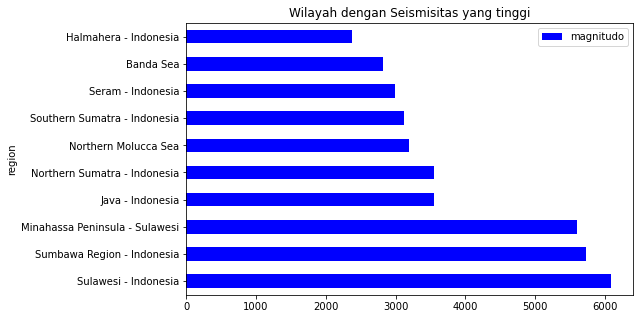

In [104]:
# Mencari 10 wilayah dengan seismistas tertinggi
seismisitas_tinggi = data.groupby(['region'])[['magnitudo']].count().sort_values(by='magnitudo',ascending=False)
seismisitas_tinggi.head(10)

# Plotting bar chart
seismisitas_tinggi.head(10).plot(kind='barh', color='blue', figsize=(8,5))
plt.title('Wilayah dengan Seismisitas yang tinggi')
plt.show()

Sepanjang tahun 2017 s.d tahun 2022, wilayah" dengan seismistas tertinggi diantaranya, Sulawesi, Sumbawa Region, Minahassa Peninsula, Java, Northern Sumatra, Southern Sumatra, Seram, Banda Sea, dan Halmahera.

### Tipe gempabumi yang paling sering terjadi di Indonesia berdasarkan Kedalamannya.

In [105]:
#Mencari tipe gempabumi yang paling sering terjadi di Indonesia berdasarkan kedalamannya.
depth_earthquake =  data.groupby(['Tipe_Gempa(Depth)'])[['depth']].count().sort_values(by='depth',ascending=False)
depth_earthquake

,depth
Tipe_Gempa(Depth),
Dangkal,50595
Menengah,7354
Dalam,854


<AxesSubplot:title={'center':'Tipe Gempabumi Berdasarkan Kedalamannya'}, ylabel='depth'>

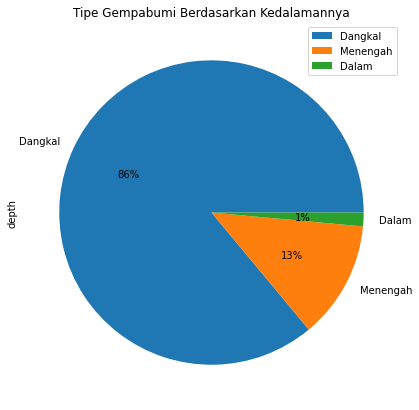

In [106]:
# Plotting pie chart
depth_earthquake.plot(kind='pie', y='depth', title = 'Tipe Gempabumi Berdasarkan Kedalamannya', autopct='%1.0f%%', figsize=(7,7))

Hasil plot pie chart menunjukkan gempabumi yang terjadi di indonesia dari tahun 2017 s.d 2022 di dominasi oleh gempabumi dangkal dengan persentase sebesar 86%.

### Tipe gempabumi yang paling sering terjadi di Indonesia berdasarkan magnitudonya.

In [107]:
#Mencari tipe gempabumi yang paling sering terjadi di Indonesia berdasarkan kekuatan gempanya.
mag_earthquake =  data.groupby(['Tipe_Gempa(Mag)'])[['magnitudo']].count().sort_values(by='magnitudo',ascending=False)
mag_earthquake

,magnitudo
Tipe_Gempa(Mag),
Kecil,40407
Mikro,15595
Sedang,2792
Besar,24
Ultra Mikro,8
Sangat Besar,0


<AxesSubplot:title={'center':'Tipe Gempabumi Berdasarkan Kekuatan Gempa'}, ylabel='magnitudo'>

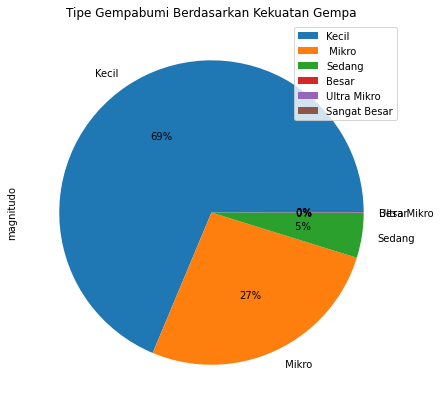

In [108]:
# Plotting pie chart
mag_earthquake.plot(kind='pie', y='magnitudo', title = 'Tipe Gempabumi Berdasarkan Kekuatan Gempa', autopct='%2.0f%%', figsize=(7,7))

Berdasarkan hasil perhitungan dan pie chart, gempabumi yang paling sering terjadi adalah gempabumi kecil dengan rentang magnitudo 3.0>M>=5.0.

### Berapa banyak gempa merusak yang pernah terjadi? Dimana saja gempa yang merusak itu terjadi?
Gempabumi merusak ialah gempabumi yang mengakibatkan kerusakan, baik itu kerusakan yang kecil (kerusakan perabotan rumah tangga) atau kerusakan besar (kerusakan infrastruktur). 

Gempabumi yang dikategorikan sebagai gempabumi merusak biasanya memiliki ciri":
- Gempa dengan magnitudo lebih dari 6.0.
- Gempa dangkal.

In [136]:
#Mengecek data" gempabumi merusak
gempa_merusak = data.loc[(data['Tipe_Gempa(Depth)'] == 'Dangkal') & (data['magnitudo'] >= 6.0)].reset_index(drop=True)
gempa_merusak

,date,time,latitude,lon,depth,magnitudo,region,Tipe_Gempa(Mag),Tipe_Gempa(Depth)
0,2017-04-28,20:23:17.828,5.45,125.00,10,7.1,Mindanao - Philippines,Besar,Dangkal
1,2017-04-28,20:23:17.828,5.45,125.00,10,7.1,Mindanao - Philippines,Besar,Dangkal
2,2017-05-29,14:35:23.343,-1.29,120.44,11,6.6,Sulawesi - Indonesia,Sedang,Dangkal
3,2017-05-29,14:35:23.343,-1.29,120.44,11,6.6,Sulawesi - Indonesia,Sedang,Dangkal
4,2017-08-13,03:08:13.468,-3.68,101.70,58,6.4,Southern Sumatra - Indonesia,Sedang,Dangkal
...,...,...,...,...,...,...,...,...,...
142,2022-09-10,23:10:45.567,-1.14,98.68,25,6.2,Southern Sumatra - Indonesia,Sedang,Dangkal
143,2022-09-10,00:05:16.748,-2.19,138.24,45,6.2,Irian Jaya - Indonesia,Sedang,Dangkal
144,2022-09-10,00:05:16.748,-2.19,138.24,45,6.2,Irian Jaya - Indonesia,Sedang,Dangkal
145,2022-09-23,20:53:00.610,3.78,96.05,51,6.2,Northern Sumatra - Indonesia,Sedang,Dangkal


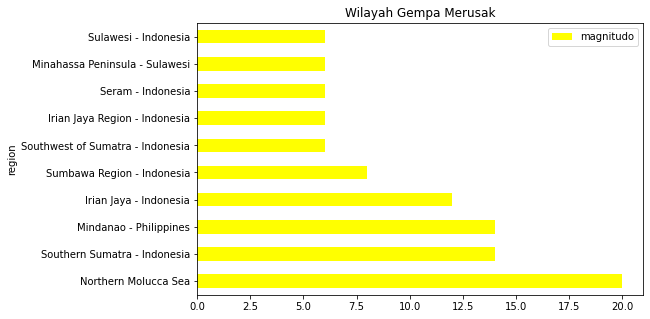

In [160]:
#Mencari tahu wilayah" gempabumi merusak
wilayah_gempa_merusak =  gempa_merusak.groupby(['region'])[['magnitudo']].count().sort_values(by='magnitudo',ascending=False)

# Plotting pie chart
wilayah_gempa_merusak.head(10).plot(kind='barh', color='yellow', figsize=(8,5))
plt.title('Wilayah Gempa Merusak')
plt.show()

- Jumlah gempabumi yang termasuk kategori merusak: 147 gempabumi.
- 10 Wilayah yang paling sering mengalami gempabumi merusak: Northern Molluca Sea, Southern Sumatra, Mindanao, Irian Jaya, Sumbawa Region, Southwest Sumatera, Irian Jaya, Seram, Minhassa Peninsula Sulawesi, dan Sulawesi.

### Tahun berapakah seismitas tertinggi.

In [152]:
# Group by year
distribusi = data.groupby(pd.Grouper(key='date', freq='Y'))[['magnitudo']].count().sort_values(by='magnitudo', ascending=False)
distribusi

,magnitudo
date,
2018-12-31,12345
2019-12-31,12111
2021-12-31,10650
2020-12-31,8515
2022-12-31,7608
2017-12-31,7597


Berdasarkan distribusi hiposenter gempabumi, seismisitas tertinggi terjadi di tahun 2018. 
Urutan seismisitas tertinggi : 2018 -> 2019 --> 2021 --> 2020 --> 2022 --> 2017.

In [153]:
data_2018= data[(data['date'] >= '2018-01-01') & ((data['date'] >= '2018-12-31'))] 
data_2018

,date,time,latitude,lon,depth,magnitudo,region,Tipe_Gempa(Mag),Tipe_Gempa(Depth)
0,2020-08-04,05:28:05.200,-1.49,100.15,10,3.8,Southern Sumatra - Indonesia,Kecil,Dangkal
1,2020-08-04,23:51:12.310,-1.65,100.25,41,5.0,Southern Sumatra - Indonesia,Sedang,Dangkal
2,2020-08-04,23:51:12.310,-1.65,100.25,41,5.0,Southern Sumatra - Indonesia,Sedang,Dangkal
3,2020-08-03,12:06:23.133,1.12,97.46,19,3.2,Northern Sumatra - Indonesia,Kecil,Dangkal
4,2020-08-04,16:37:30.478,-5.17,101.97,10,3.8,Southwest of Sumatra - Indonesia,Kecil,Dangkal
...,...,...,...,...,...,...,...,...,...
58821,2022-09-30,02:45:26.316,-0.02,123.59,108,3.5,Minahassa Peninsula - Sulawesi,Kecil,Menengah
58822,2022-09-30,00:55:25.665,-5.58,131.14,132,4.1,Banda Sea,Kecil,Menengah
58823,2022-09-30,00:21:53.907,-10.34,124.75,10,3.8,Timor Region,Kecil,Dangkal
58824,2022-09-30,00:17:02.868,-2.27,140.10,10,3.1,Near North Coast of Irian Jaya,Kecil,Dangkal


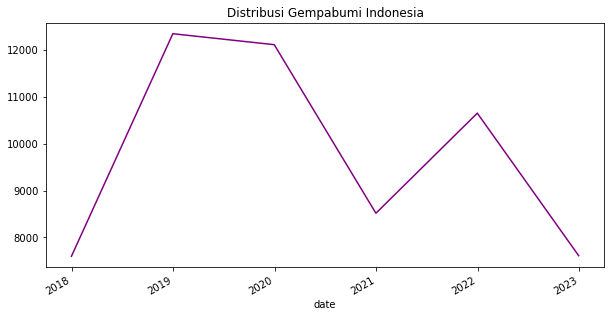

In [154]:
# membuat line chart Distribusi Gempa
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Distribusi Gempabumi Indonesia')
distribusi['magnitudo'].plot(kind='line',ax=ax, color='purple')
plt.show()

## Kesimpulan 

**Hasil analisis poin penjabaran**
1. Berdasarkan perhitungan nilai rata" dan standar deviasi, data tersebar luas. Namun, data tersebut dapat kita percaya karena nilai rata"nya berada dalam rentang nilai confidence interval.
2.  Wilayah dengan seismitas tertinggi di Indonesia antara lain: Sulawesi, Sumbawa Region, Minahassa Peninsula, Java, Northern Sumatra, Southern Sumatra, Seram, Banda Sea, dan Halmahera.
3. Berdasarkan kedalamannya gempabumi yang paling sering terjadi di Indonesia adalah gempabumi dangkal 0-100 km. Gempabumi ini cukup berbahaya jika gempabuminya tergolong gempabumi dengan magnitudo yang besar.
4. Berdasarkan kekuatannya, gempabumi yang paling sering terjadi adalah gempabumi kecil 3.0>M=>5.0. Gempabumi ini memang tidak berbahaya jika frekuensinya sedikit, namun kita perlu waspada jika frekuensinya tinggi karena berpotensi menyebabkan gempa besar.
5. Sepanjang tahun 2017 hingga tahun 2022, jumlah gempabumi merusak ada 147 yang dominan terjadi di Northern Molluca Sea, Southern Sumatra, Mindanao, Irian Jaya, Sumbawa Region, Southwest Sumatera, Irian Jaya, Seram, Minhassa Peninsula Sulawesi, dan Sulawesi.
6. Aktivitas tertinggi terjadi pada tahun 2018 dengan total 38945 event gempabumi. 

Beberapa wilayah Indonesia memiliki aktivitas kegempaan yang tinggi, yang berpotensi mengalami kerusakan" besar. Oleh karena itu, kita perlu mengurangi dampak dari bencana gempabumi:
- Pemerintah harus lebih aktif melakukan sosialisasi kepada masyarakat terkait bencana gempabumi, agar masyarakat lebih sigap dalam menghadapi bencana gempabumi.
- Melengkapi jalur evakuasi.
- Diharapkan pemerintah segara mengirimkan informasi terkait urgensi apabila terjadi bencana yang besar. Diharapkan semua pihak tidak lalai bekerja apabila terkait kebencanaan. Contoh kelalaian: Tidak mengirim siyal urgensi kepada masyarakat terkait potensi terjadinya tsunami.
- Pemerintah mampu melengkapi alat" pendeteksi kebencanaan yang hilang dan selalu memonitori alat" tersebut agar tidak dicuri oleh pihak yang tidak bertanggung jawab.
- Membuat tembok yang tahan tsunami bagi wilayah" yang rentan terhadap bencana gempabumi dan tsunami.
- Jika ingin melakukan pembangunan yang besar"an, lakukan studi terlebih dahulu. Pastikan wilayahnya merupakan wilayah yang cocok untuk ditempati bangunan" besar. Jangan lupa membuat bangunan yang tahan gempa.